# Prática Independente - Modelagem estatística I.

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Tamanho padrões das figuras e a fonte de seus textos neste notebook
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

#Funções que serão utilizadas ao longo do notebook

In [41]:
def EDA (df):
    """Função que retona algumas métricas de análise estatística descritiva personalizadas"""
    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()
    
    # Outro ponto para ser verificado, porque para criar a coluna com a quantidade de valores unicos por coluna
    # Não utilizei a função df.unique() 
    colunas = sorted(df.columns.tolist(), key=str.lower, reverse=False)
    eda_df['Amount_Unique'] = filtered_result = list(map(lambda x: len(df[x].unique().tolist()), colunas))
    
    eda_df['Mean'] = np.round(df.mean(), 2)
    eda_df['Median'] = np.round(df.median(), 2)
    
    eda_df['Max'] = df.max()
    eda_df['Min'] = df.min()
    eda_df['STD'] = np.round(df.std(), 2)
    
    return pd.DataFrame(eda_df)

In [43]:
from scipy import stats

def normal(df, col, threshold = 0.05):

  """Função que retorna se uma distribuição é ou não normal"""
  try:
    zscore, p_value = stats.normaltest(df[col])
    #print('p_value:', p_value)
    #print("stats.normaltest(df['{}']):".format(col), stats.normaltest(df[col]))
        
    if p_value < threshold:
      result = 'A distribuição não é normal'
    else:
      result = 'A distribuição é normal' 
  except:
    zscore = p_value = np.nan
    result = 'Não aplicável'
  return result


### Data fields:

#### Aqui está uma breve descrição dos dados.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale    

#### Exercício 1 - Faça a leitura do arquivo `IowaHousePricing.csv` e obtenha as informações iniciais para a decrição do `dataset`.

In [6]:
dados = pd.read_csv('IowaHousePricing.csv')
dados.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

1) Temos 2919 linhas e 81 colunas (80 variáveis preditoras a priori já que uma é a variável resposta - preço da casa).

2) Colunas com grande quantidade de valores nulos:

  a) Alley; b) FireplaceQu; c) PoolQC; d) Fence; e) MiscFeature e f) SalePrice (variável resposta). 

#### Exercício 2 - Faça uma seleção inicial do número de colunas que você imagina que possuam uma maior relevância para o `dataset` e realize uma contagem inicial do número de nulos e sua porcentagem no `dataset`, incluindo os tipos e a contagem de cada tipo de dado. Calcule também os valores de tendencia central de cada coluna do `dataset`.

In [24]:
#Vamos destacar as variáveis que possuem de 50% pra cima de correlação linear com a variável target (salePrice)
dados_corr = dados.corr()[dados.corr()>= 0.50]['SalePrice'].dropna()
dados_corr

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

OverallQual: Overall material and finish quality

YearBuilt: Original construction date

YearRemodAdd: Remodel date

TotalBsmtSF: Total square feet of basement area

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet

FullBath: Full bathrooms above grade

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

SalePrice: the property's sale price in dollars. This is the target variable that you're trying to predict.



In [80]:
#Correlação de GarageCars, GarageArea, 1stFlrSF e TotalBsmtSF
dados[['GarageCars', 'GarageArea', '1stFlrSF', 'TotalBsmtSF']].corr()

,GarageCars,GarageArea,1stFlrSF,TotalBsmtSF
GarageCars,1.000000,0.889700,0.440540,0.437997
GarageArea,0.889700,1.000000,0.492011,0.486067
1stFlrSF,0.440540,0.492011,1.000000,0.801670
TotalBsmtSF,0.437997,0.486067,0.801670,1.000000


GarageCars (quantos carros cabem na garagem) e GarageArea (Area da garagem) não faz sentido, pois são a mesma informação dada em unidades diferentes. Nesse caso teríamos um problema de multicolinearidade e o nosso modelo seria afetado negativamente por não saber qual das variáveis considerar no cálculo. A mesma ideia vale para TotalBsmtSF e 1stFlrSF (vamos retirar 1stFlrSF).

In [81]:
#Novo dataframe somente com as variáveis com correlação linear maior ou igual a 50%
dados_preditoras = dados[dados_corr.index.tolist()]

#Retirando GarageCars para não haver multicolinearidade
dados_preditoras.drop(['GarageCars', '1stFlrSF'], axis= 1, inplace= True)

#Primeiras cinco linhas do novo dataframe gerado
dados_preditoras.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,SalePrice
0,7,2003,2003,856.0,1710,2,8,548.0,208500.0
1,6,1976,1976,1262.0,1262,2,6,460.0,181500.0
2,7,2001,2002,920.0,1786,2,6,608.0,223500.0
3,7,1915,1970,756.0,1717,1,7,642.0,140000.0
4,8,2000,2000,1145.0,2198,2,9,836.0,250000.0


In [82]:
EDA(dados_preditoras)

,Amount_NaN,%_NaN,DType,Amount_Data,Amount_Unique,Mean,Median,Max,Min,STD
OverallQual,0,0.0,int64,2919,5,6.09,6.0,10.0,1.0,1.41
YearBuilt,0,0.0,int64,2919,604,1971.31,1973.0,2010.0,1872.0,30.29
YearRemodAdd,0,0.0,int64,2919,1292,1984.26,1993.0,2010.0,1950.0,20.89
TotalBsmtSF,1,0.0,float64,2918,10,1051.78,989.5,6110.0,0.0,440.77
GrLivArea,0,0.0,int64,2919,664,1500.76,1444.0,5642.0,334.0,506.05
FullBath,0,0.0,int64,2919,1059,1.57,2.0,4.0,0.0,0.55
TotRmsAbvGrd,0,0.0,int64,2919,14,6.45,6.0,15.0,2.0,1.57
GarageArea,1,0.0,float64,2918,118,472.87,480.0,1488.0,0.0,215.39
SalePrice,1459,0.5,float64,1460,61,180921.20,163000.0,755000.0,34900.0,79442.50


1) Temos enorme quantidade de dados faltando na variável que queremos prever (o preço das casas): 50%. Isto é um grande problema. Quando temos dados faltando em variáveis preditoras, podemos fazer a utilização de modelos para prever esses valores faltantes baseado em outras linhas com dados não faltantes. Porém, neste caso, por ser justamente a variável que queremos prever, não me parece fazer sentido a utilização de tais técnicas.

2) Não temos variáveis categóricas, mas algumas são possíveis de criar: 

  a) calcular a diferença do ano de construção e ano de renovação, se a diferença for maior que 0 damos o valor de 1 aquela linha indicando que a casa foi renovada; caso contrário, damos o valor de zero indicando que a casa não foi renovada. Criaríamos, assim, uma nova variável categórica.

  b) Outra variável possível é calcular este ano de renovação em relação à data atual e levar em consideração se faz muitos ou poucos anos que a casa foi renovada. Seria uma variável quantitativa discreta, neste caso.

#### Exercício 3 - Calcule o histograma dos principais atributos.

OverallQual

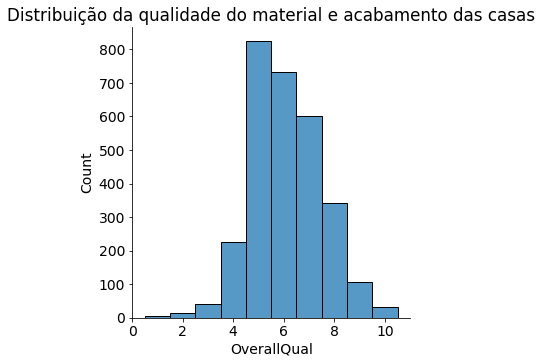

In [93]:
#Aqui o parâmetro discrete nos retorna os tamanhos da barra levando em conta que os dados tem uma variável quantitativa discreta
sns.displot(dados_preditoras['OverallQual'], discrete= True)

#Título
plt.title('Distribuição da qualidade do material e acabamento das casas');

As casas possuem, num intervalo de 1 a 10, em media 6 pontos de qualidade de material e acabamento. Estando concentradas no intervalor de cinco e 7. Isto nos indica algo como que "mediano", no sentido popular do termo, isto é: em geral não são casas com baixa qualidade nesse aspecto e nem muita alta também. A moda se encontra em 5, seria o "mais ou menos" tendo em vista o intervalo das notas.

Ano de construção e ano de renovação

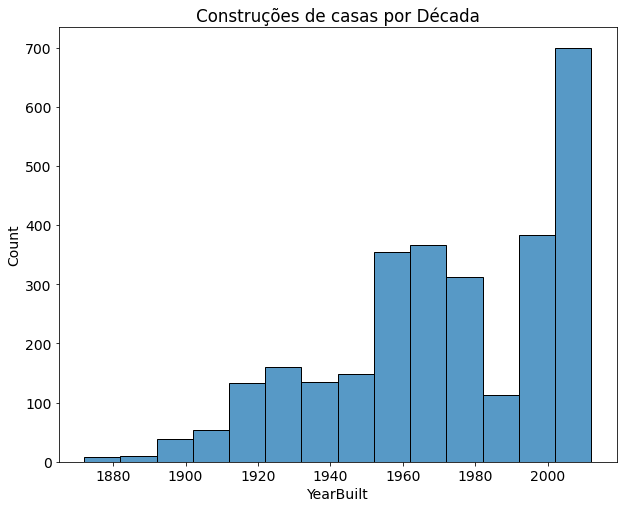

In [96]:
#binwidth -> largura do bin: cada barra representará 10 anos. 
#Estamos, portanto, analisando a quantidade de contruções por década
sns.histplot(dados_preditoras['YearBuilt'], binwidth= 10)

#Título
plt.title('Construções de casas por Década');

Vemos que temos uma concentração alta de casas contruídas entre 1960 e 1980 e a maior quantidade de construções se deu em anos mais recentes (entre 2000 e 2010). Importante ressaltar que possuímos casas bem antigas (datadas do século XIX).

TotalBsmtSF: Total square feet of basement area

'A distribuição é normal'

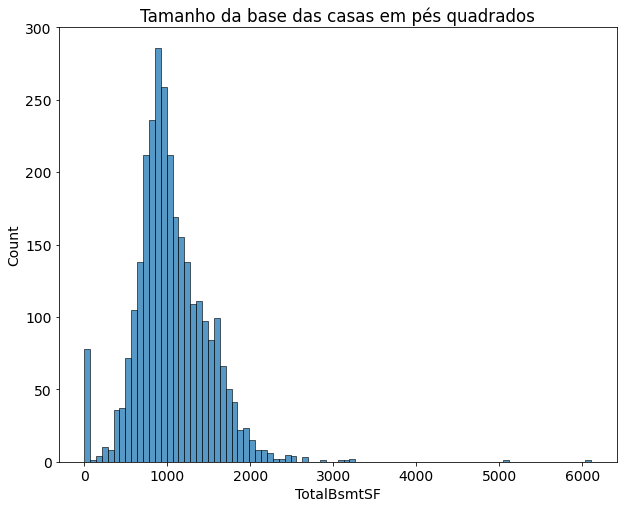

In [88]:
#Histograma
sns.histplot(dados_preditoras['TotalBsmtSF'])

#Título
plt.title('Tamanho da base das casas em pés quadrados');

#Indicando se a distribuição é ou não normal
normal(dados_preditoras, 'TotalBsmtSF')

Temos uma distribuição um pouco enviesada à direita (apesar de estatisticamente termos uma distribuição normal indicada pelo teste) e com um número de casas com tamanho da base de 0. 

Como não temos casas com 0 GrLivArea, isto pode nos indicar não que esse 0 não faça sentido, mas que somente a parte de cima da casa está sendo colocada à venda, por exemplo. 

Poderíamos pensar em condensar essas informações do tamanho total da casa (somando as colunas que medem espaços da casa em pés quadrados) ou perderíamos informações singulares que poderia ser levadas em conta pelo modelo numa variação "qualitativa entre tamanho do segundo andar e da garagem" (sendo aquele mais valioso que este ou vice-versa)?

SalePrice -> Variável que queremos prever

'A distribuição é normal'

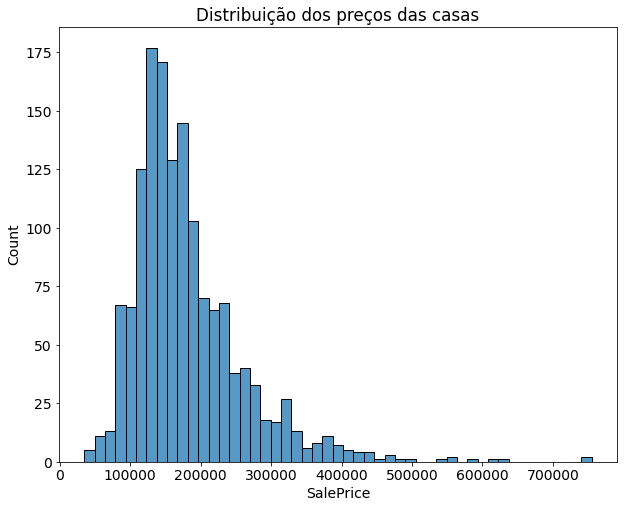

In [97]:
#Histograma
sns.histplot(dados_preditoras['SalePrice'])

#Título
plt.title('Distribuição dos preços das casas');

#Indicando se a distribuição é ou não normal
normal(dados_preditoras, 'SalePrice')

Os preços das casas estão concentrados em valores de 100 a 200 mil dólares tendo algumas poucas casas com valores mais altos (acima de 500 mil dólares). Apesar desta cauda na direita da distribuição, nosso teste estístico está nos indicando que temos uma distribuição normal: tal fator provavelmente nos ajudaria no momento de construção de um modelo linear já que um de seus pressupostos é a normalidade das distribuições utilizadas nele. Precisamos ressaltar que, porém, temos 50% dos dados faltando em preço das casas. Nesse sentido, parece que estamos perdendo muito de variação e comportamento do preço das casas e não saberíamos se de fato o modelo teria boa performance em exemplos reais após sua construção.

#### Exercício 4 - Estude como a média dos tamanhos dos lotes variou com o ano de construção.

#### Exercício 5 - Encontre as casas cujo ano de reforma ocorreu dentro de 10 anos do ano de contrução.

#### Exercício 6 - Estude a dispersão entre a área construídeo e o preçode venda.

#### Exercício 7 - Estude como a dispersão entre a área construída e o preço se altera com o classificação de zoneamento.